In [2]:
from sklearn import preprocessing
import numpy as np
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
with open ('/home/nisha/Desktop/Dinucleotide_project/a_cluster_maps/fungi/arr_fungi') as fh:
    for line in fh:
        columns = line.strip().split(',')
        #print(columns)
        print(columns[0],columns[1], columns[8], columns[14], columns[4], columns[15], columns[10], columns[9], columns[5], columns[11],columns[17], columns[12], columns[2], columns[7], columns[3], columns[6], columns[16], columns[13], sep = '\t')        

name	class	TG	CA	AG	CT	GA	TC	AC	GT	CC	GG	AA	TT	AT	TA	CG	GC
Saprolegnia_parasitica_CBS_223.65	protozoa	1.08	1.08	0.94	0.93	1.17	1.17	1.03	1.02	0.57	0.57	0.88	0.88	0.93	0.47	1.31	1.19
Leishmania_infantum_JPCM5	protozoa	1.21	1.21	1.07	1.08	1.08	1.08	0.99	0.98	0.63	0.63	0.81	0.81	0.92	0.54	1.08	1.21
Plasmodium_malariae	protozoa	1.11	1.11	0.93	0.93	1	1	0.91	0.9	0.96	0.96	0.76	0.76	0.97	0.86	0.76	1.06
Thalassiosira_pseudonana_CCMP1335	protozoa	1.23	1.23	1	1	1.2	1.2	0.96	0.96	0.76	0.75	0.82	0.82	1.01	0.57	0.84	0.91
Trypanosoma_theileri	protozoa	1.21	1.2	0.97	0.97	1.04	1.04	1.01	1.01	0.8	0.8	0.81	0.81	0.96	0.73	0.82	0.98
Trypanosoma_brucei_gambiense_DAL972	protozoa	1.18	1.18	0.93	0.93	1	0.99	1	1	0.77	0.77	0.88	0.88	0.92	0.66	0.95	1.06
Plasmodium_vinckei_vinckei	protozoa	1.16	1.17	0.85	0.84	1.03	1.03	0.83	0.83	1.06	1.06	0.74	0.74	1.03	0.85	0.68	1.1
Plasmodium_cynomolgi_strain_B	protozoa	1.09	1.09	0.95	0.94	1.04	1.04	0.89	0.89	0.88	0.88	0.84	0.83	0.94	0.73	0.85	0.97
Trypanosoma_grayi	protozoa	1.

In [3]:
df = pd.read_table('/home/nisha/Desktop/Dinucleotide_project/a_cluster_maps/fungi/arr_fungi', sep = ',')
df

,name,class,group,TG,CA,AG,CT,GA,TC,AC,GT,CC,GG,AA,TT,AT,TA,CG,GC
0,Aaosphaeria_arxii_CBS_175.79,fungi,ascomycota,1.12,1.12,1.01,1.01,1.18,1.18,0.89,0.88,0.76,0.76,0.83,0.83,1.07,0.63,0.94,1.00
1,Acaromyces_ingoldii,fungi,basidiomycota,1.10,1.10,1.13,1.12,1.24,1.24,0.86,0.85,0.68,0.68,0.84,0.84,0.96,0.44,1.00,1.09
2,Agaricus_bisporus_var._bisporus_H97,fungi,basidiomycota,1.09,1.09,0.98,0.97,1.18,1.18,0.89,0.88,0.79,0.79,0.83,0.83,1.04,0.65,0.96,0.95
3,Agaricus_bisporus_var._burnettii_JB137-S8,fungi,basidiomycota,1.09,1.09,0.98,0.97,1.18,1.18,0.89,0.88,0.79,0.78,0.83,0.83,1.04,0.65,0.96,0.95
4,Alternaria_alternata,fungi,ascomycota,1.14,1.15,1.05,1.04,1.15,1.15,0.93,0.93,0.72,0.72,0.81,0.81,1.01,0.67,0.96,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Yarrowia_lipolytica_CLIB122,fungi,ascomycota,1.18,1.18,1.12,1.11,1.23,1.23,0.96,0.96,0.78,0.78,0.82,0.82,0.88,0.49,0.80,0.88
269,Zasmidium_cellare_ATCC_36951,fungi,ascomycota,1.15,1.15,1.06,1.05,1.23,1.23,0.89,0.89,0.72,0.72,0.83,0.83,1.04,0.51,0.96,1.02
270,Zygosaccharomyces_rouxii,fungi,ascomycota,1.17,1.17,1.00,1.00,1.10,1.09,0.93,0.93,0.91,0.91,0.83,0.82,0.97,0.73,0.68,0.90
271,Zygotorulaspora_mrakii,fungi,ascomycota,1.17,1.17,1.00,0.99,1.12,1.12,0.87,0.87,0.83,0.83,0.83,0.83,0.98,0.69,0.78,1.03


In [4]:
species = df['name']
grouping = df['group']

In [6]:
non_numeric =['name', 'class', 'group']
species = df['name']
non_numeric

['name', 'class', 'group']

In [7]:
df_numeric = df.drop(non_numeric, axis = 1)
df_numeric

,TG,CA,AG,CT,GA,TC,AC,GT,CC,GG,AA,TT,AT,TA,CG,GC
0,1.12,1.12,1.01,1.01,1.18,1.18,0.89,0.88,0.76,0.76,0.83,0.83,1.07,0.63,0.94,1.00
1,1.10,1.10,1.13,1.12,1.24,1.24,0.86,0.85,0.68,0.68,0.84,0.84,0.96,0.44,1.00,1.09
2,1.09,1.09,0.98,0.97,1.18,1.18,0.89,0.88,0.79,0.79,0.83,0.83,1.04,0.65,0.96,0.95
3,1.09,1.09,0.98,0.97,1.18,1.18,0.89,0.88,0.79,0.78,0.83,0.83,1.04,0.65,0.96,0.95
4,1.14,1.15,1.05,1.04,1.15,1.15,0.93,0.93,0.72,0.72,0.81,0.81,1.01,0.67,0.96,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,1.18,1.18,1.12,1.11,1.23,1.23,0.96,0.96,0.78,0.78,0.82,0.82,0.88,0.49,0.80,0.88
269,1.15,1.15,1.06,1.05,1.23,1.23,0.89,0.89,0.72,0.72,0.83,0.83,1.04,0.51,0.96,1.02
270,1.17,1.17,1.00,1.00,1.10,1.09,0.93,0.93,0.91,0.91,0.83,0.82,0.97,0.73,0.68,0.90
271,1.17,1.17,1.00,0.99,1.12,1.12,0.87,0.87,0.83,0.83,0.83,0.83,0.98,0.69,0.78,1.03


In [8]:
lut = dict(zip(grouping.unique(), ['#F99FE6','#00ffff', '#ff4d4d','#D033FF' ,'#a0522d','#FF6700', '#F9E79F', '#33FF86','#0F020C' , '#ff4d4d', '#999900','#b3ccff'])) #, , , , , '#ffff33']))
lut


{'ascomycota': '#F99FE6', 'basidiomycota': '#00ffff', 'other_fungi': '#ff4d4d'}

In [9]:
row_colors = grouping.map(lut)
row_colors

0      #F99FE6
1      #00ffff
2      #00ffff
3      #00ffff
4      #F99FE6
        ...   
268    #F99FE6
269    #F99FE6
270    #F99FE6
271    #F99FE6
272    #F99FE6
Name: group, Length: 273, dtype: object

<Figure size 4320x3384 with 0 Axes>

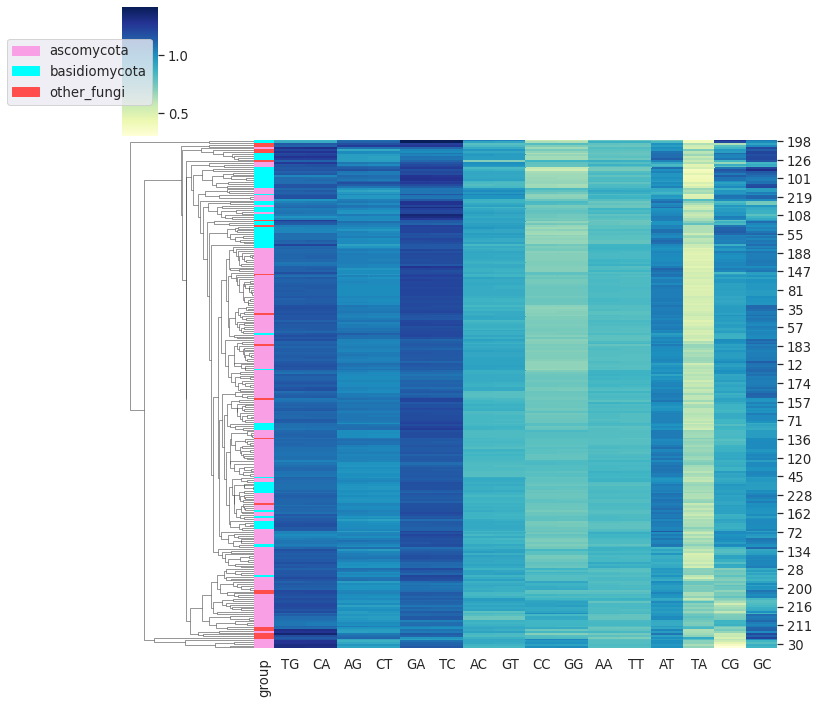

In [11]:
import matplotlib.patches as mpatches
import seaborn as sns



legend_patch = []

for x in lut.keys():
    legend_patch.append(mpatches.Patch(color=lut[x], hatch='o', label=x))
sns.set(font_scale = 1.2)

fig = plt.figure(figsize =(60,47))
sns.color_palette()
ax = sns.clustermap(df_numeric, cmap="YlGnBu", col_cluster = False,row_colors = row_colors, yticklabels=species)

plt.legend(handles=legend_patch,loc='right')
plt.savefig('fungicopy1.jpg')